[LinkedIn](https://www.linkedin.com/in/oguzhantsn/)

[GitHub - PersonaPlex](https://github.com/NVIDIA/personaplex)

In [ ]:
# Opus ses kodek'i için kurulum
!sudo apt-get install -y libopus-dev

In [ ]:
# repoyu klonluyoruz
!git clone https://github.com/NVIDIA/personaplex.git
%cd personaplex

In [ ]:
%ls

In [ ]:
# gerekli kütüphaneler çakışıyordu, kütüphanelerin bu versiyonlarında sıkıntı çıkmıyor
!pip uninstall -y transformers huggingface-hub

!pip install moshi/ accelerate
!pip install "huggingface_hub>=0.25.0" "transformers>=4.41.0"
!pip install "torch==2.4.1" "torchvision==0.19.1" "torchaudio==2.4.1" --index-url https://download.pytorch.org/whl/cu121

In [ ]:
# Moshi'nin arayüzüne ulaşmak için tünel kullanmak gerekiyor
# Localtunnel ve pinggy denedim fakat memnun kalmadım
# CloudFlare daha iyi ve kullanımı kolay

!wget -q -nc https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!mv cloudflared-linux-amd64 cloudflared
!chmod +x cloudflared

Bu kısımda HuggingFace üzerinden yazma iznine sahip tokeni almanız lazım.

[Token](https://huggingface.co/settings/tokens)lerinizi yönetebileceğiniz sayfa burası. "**Create New Token**" tuşuna bastıktan sonra "***Token Type***" olarak "**WRITE**" yetkisine sahip token oluşturmanız lazım. Tokeniniz için isim verdikten sonra "**Create token**" tuşuna basın.

Ekrana gelen tokeni kopyaladıktan sonra alttaki hücrede, **HF_TOKEN** değişkeninin değerine tırnak içinde kalacak şekilde yapıştırın.

In [ ]:
import os

os.environ["HF_TOKEN"]="HUGGINGFACE_WRITE_TOKEN_BURAYA"

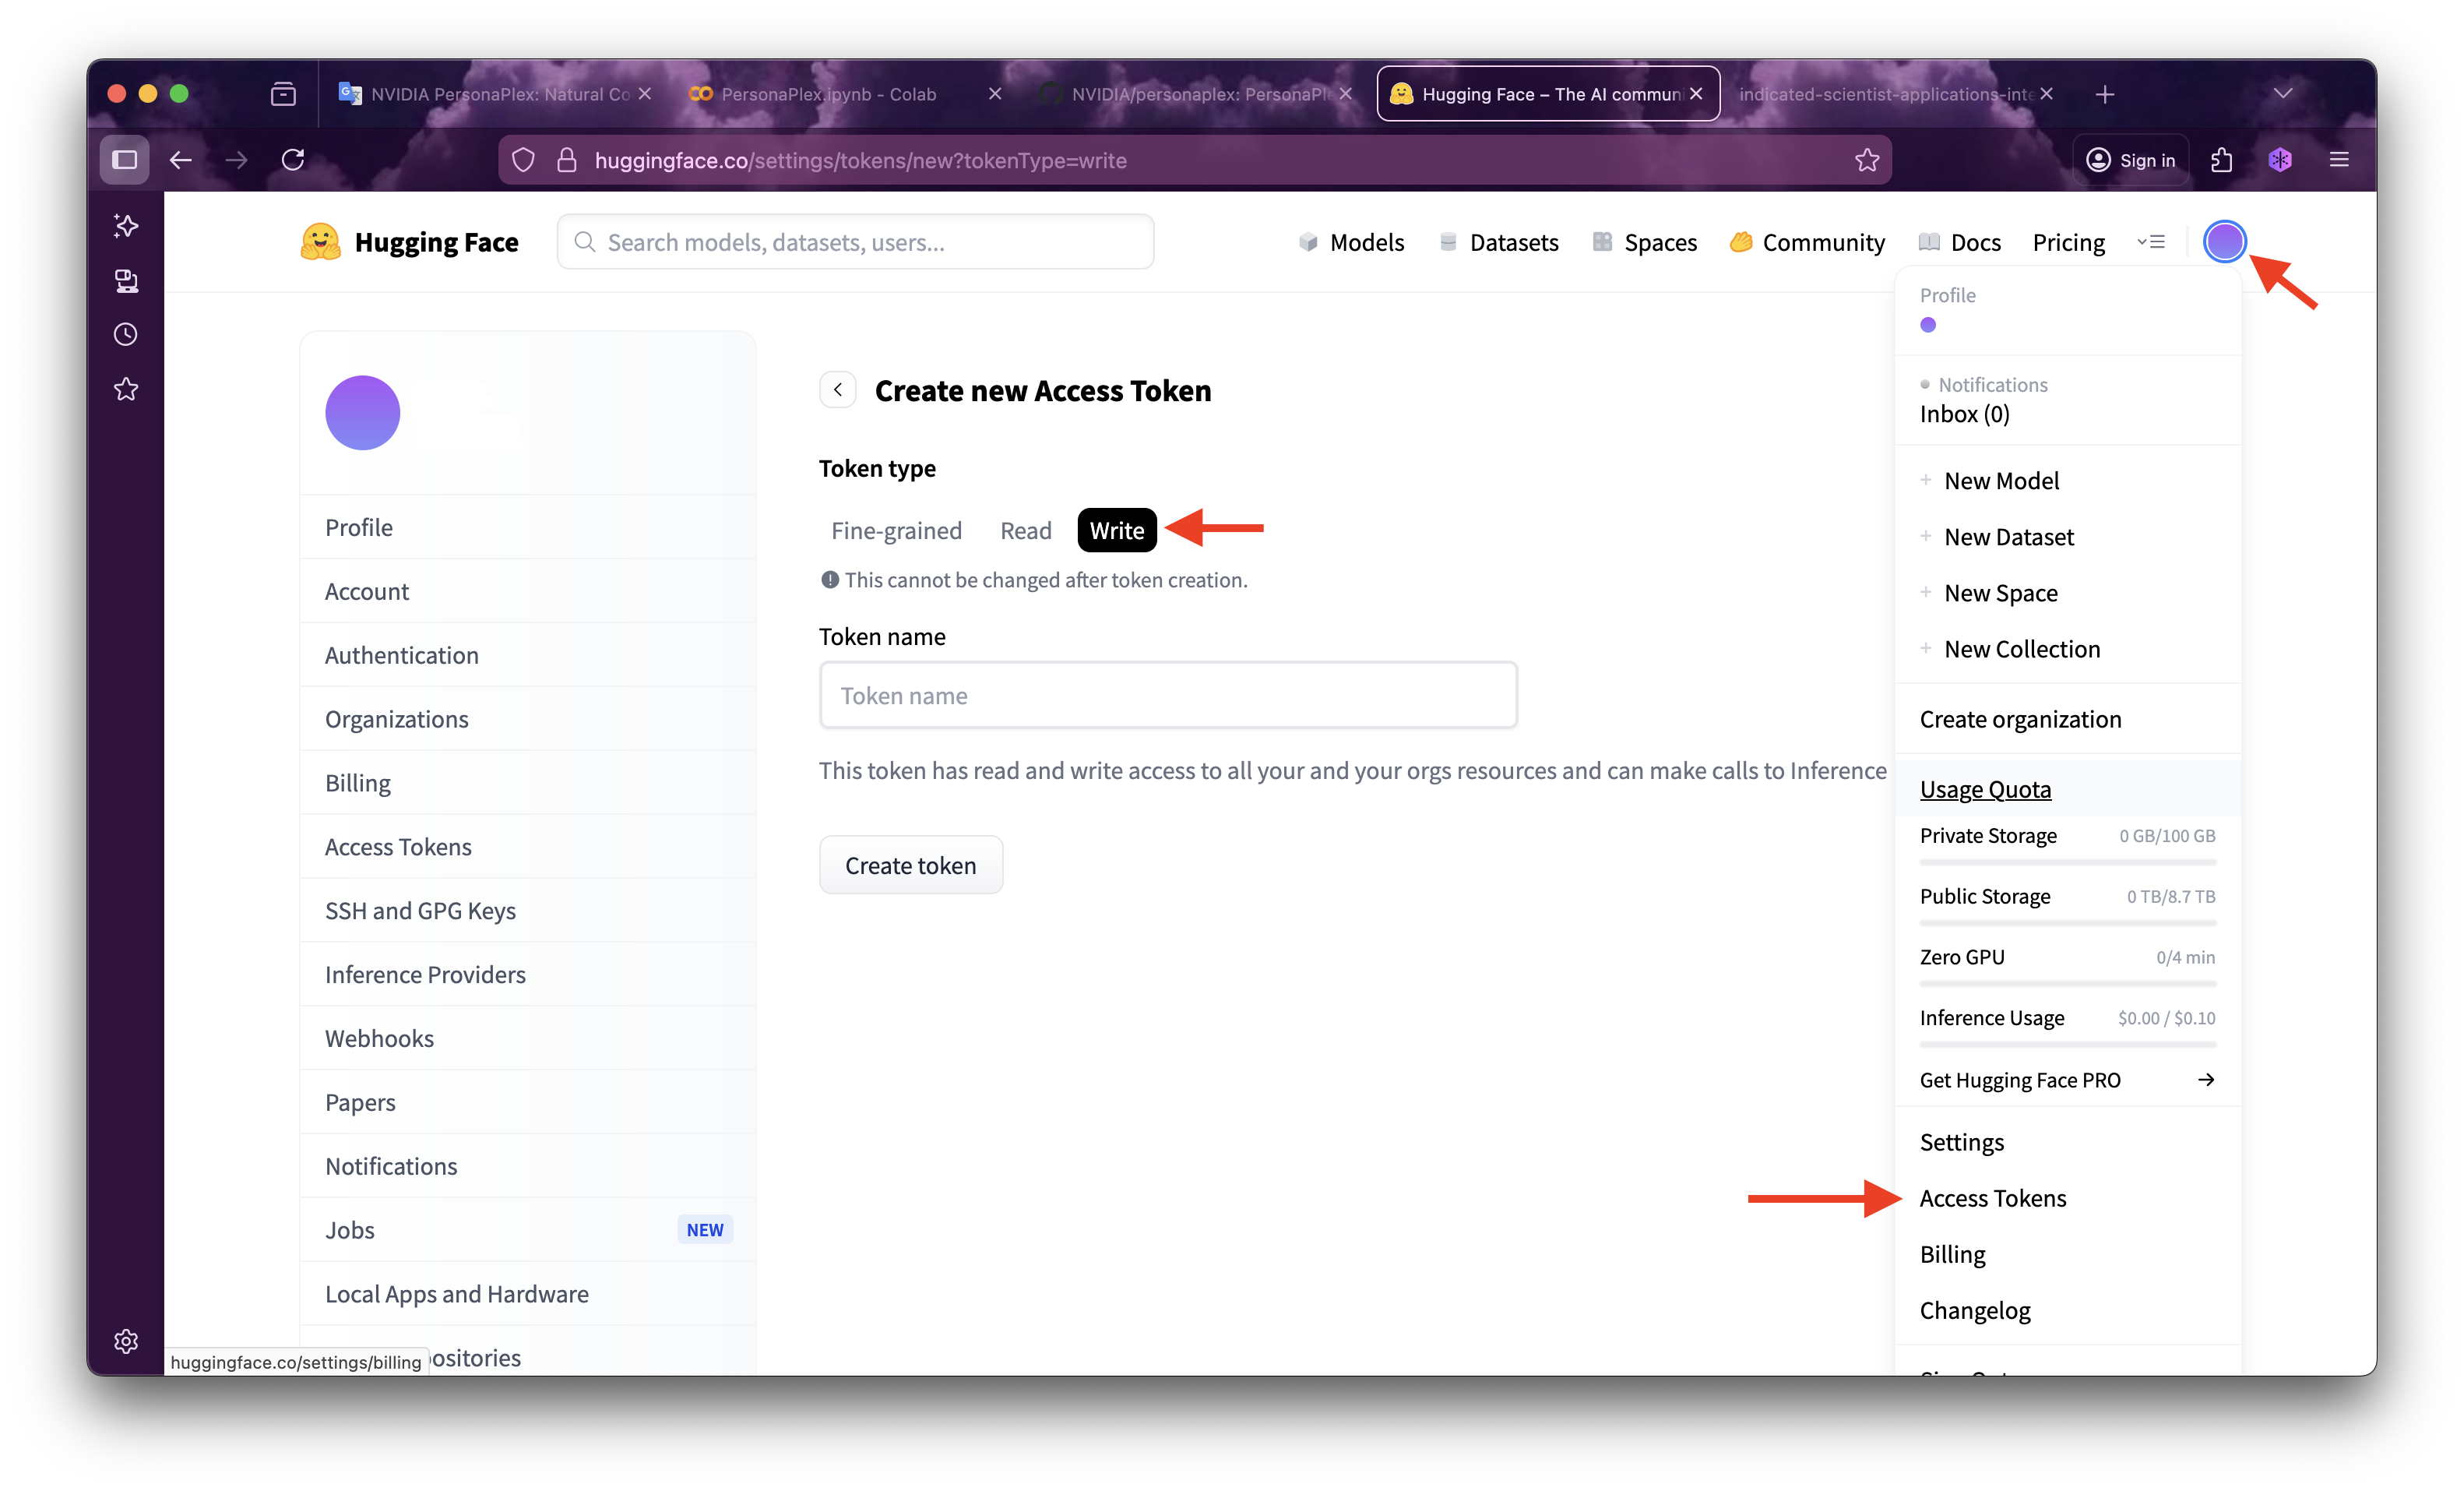

In [ ]:

# Alttaki çıktıyı hücrenin çıktı kısmında gördüğünüzde model yüklenmiş
# ve kullanıma hazır demek
# ======== Running on http://0.0.0.0:8998 ========

!python -m moshi.server --port 8998 --device cuda

**NOT**: Bu kısmı Terminal'de (sol altta - Variables'in yanında) çalıştırmanız lazım.

Alt hücredeki satırı kopyalayıp Terminal'de yapıştırıp çalıştırın. Üst hücredeki kod çalışırken alt hücredeki kod çalışmayacağı için tünel başarılı oluşmayacak.


In [ ]:
cd personaplex && ./cloudflared tunnel --url http://localhost:8998

Komutu çalıştırdıktan sonra çıktılar içerisinde https ile başlayan bir link oluşacak. O linki tarayıcınıza yapıştırdıktan sonra Moshi arayüzüne ulaşabilirsiniz.

örnek link: https://indicated-scientist-applications-intense.trycloudflare.com/

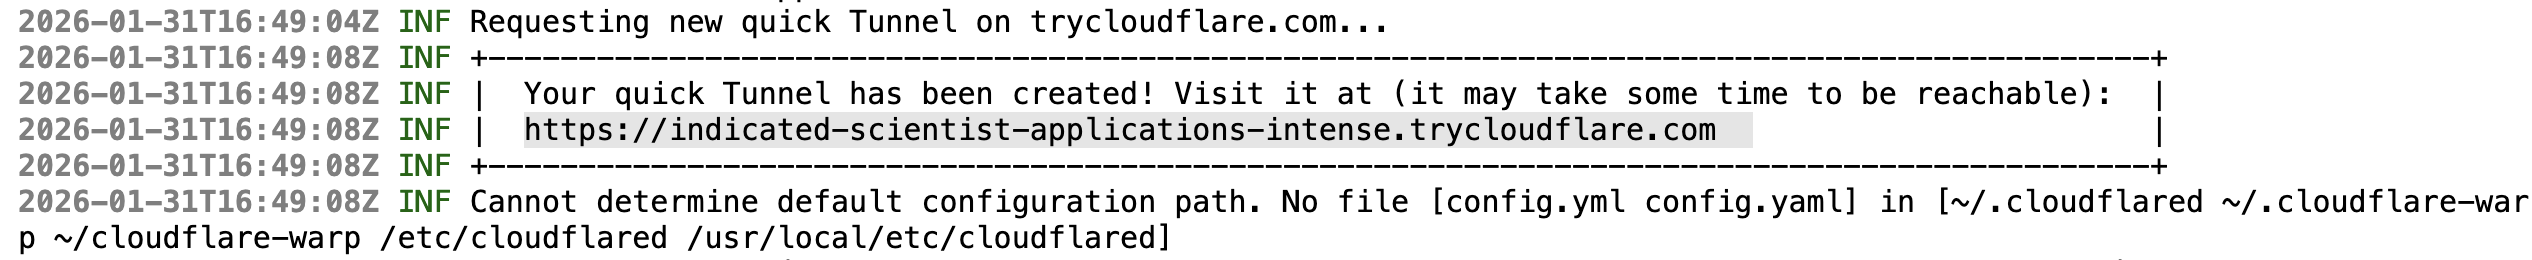

İlgili linki tarayıcınıza yapıştırıp açtıktan sonra Moshi'nin arayüzü gelecek:

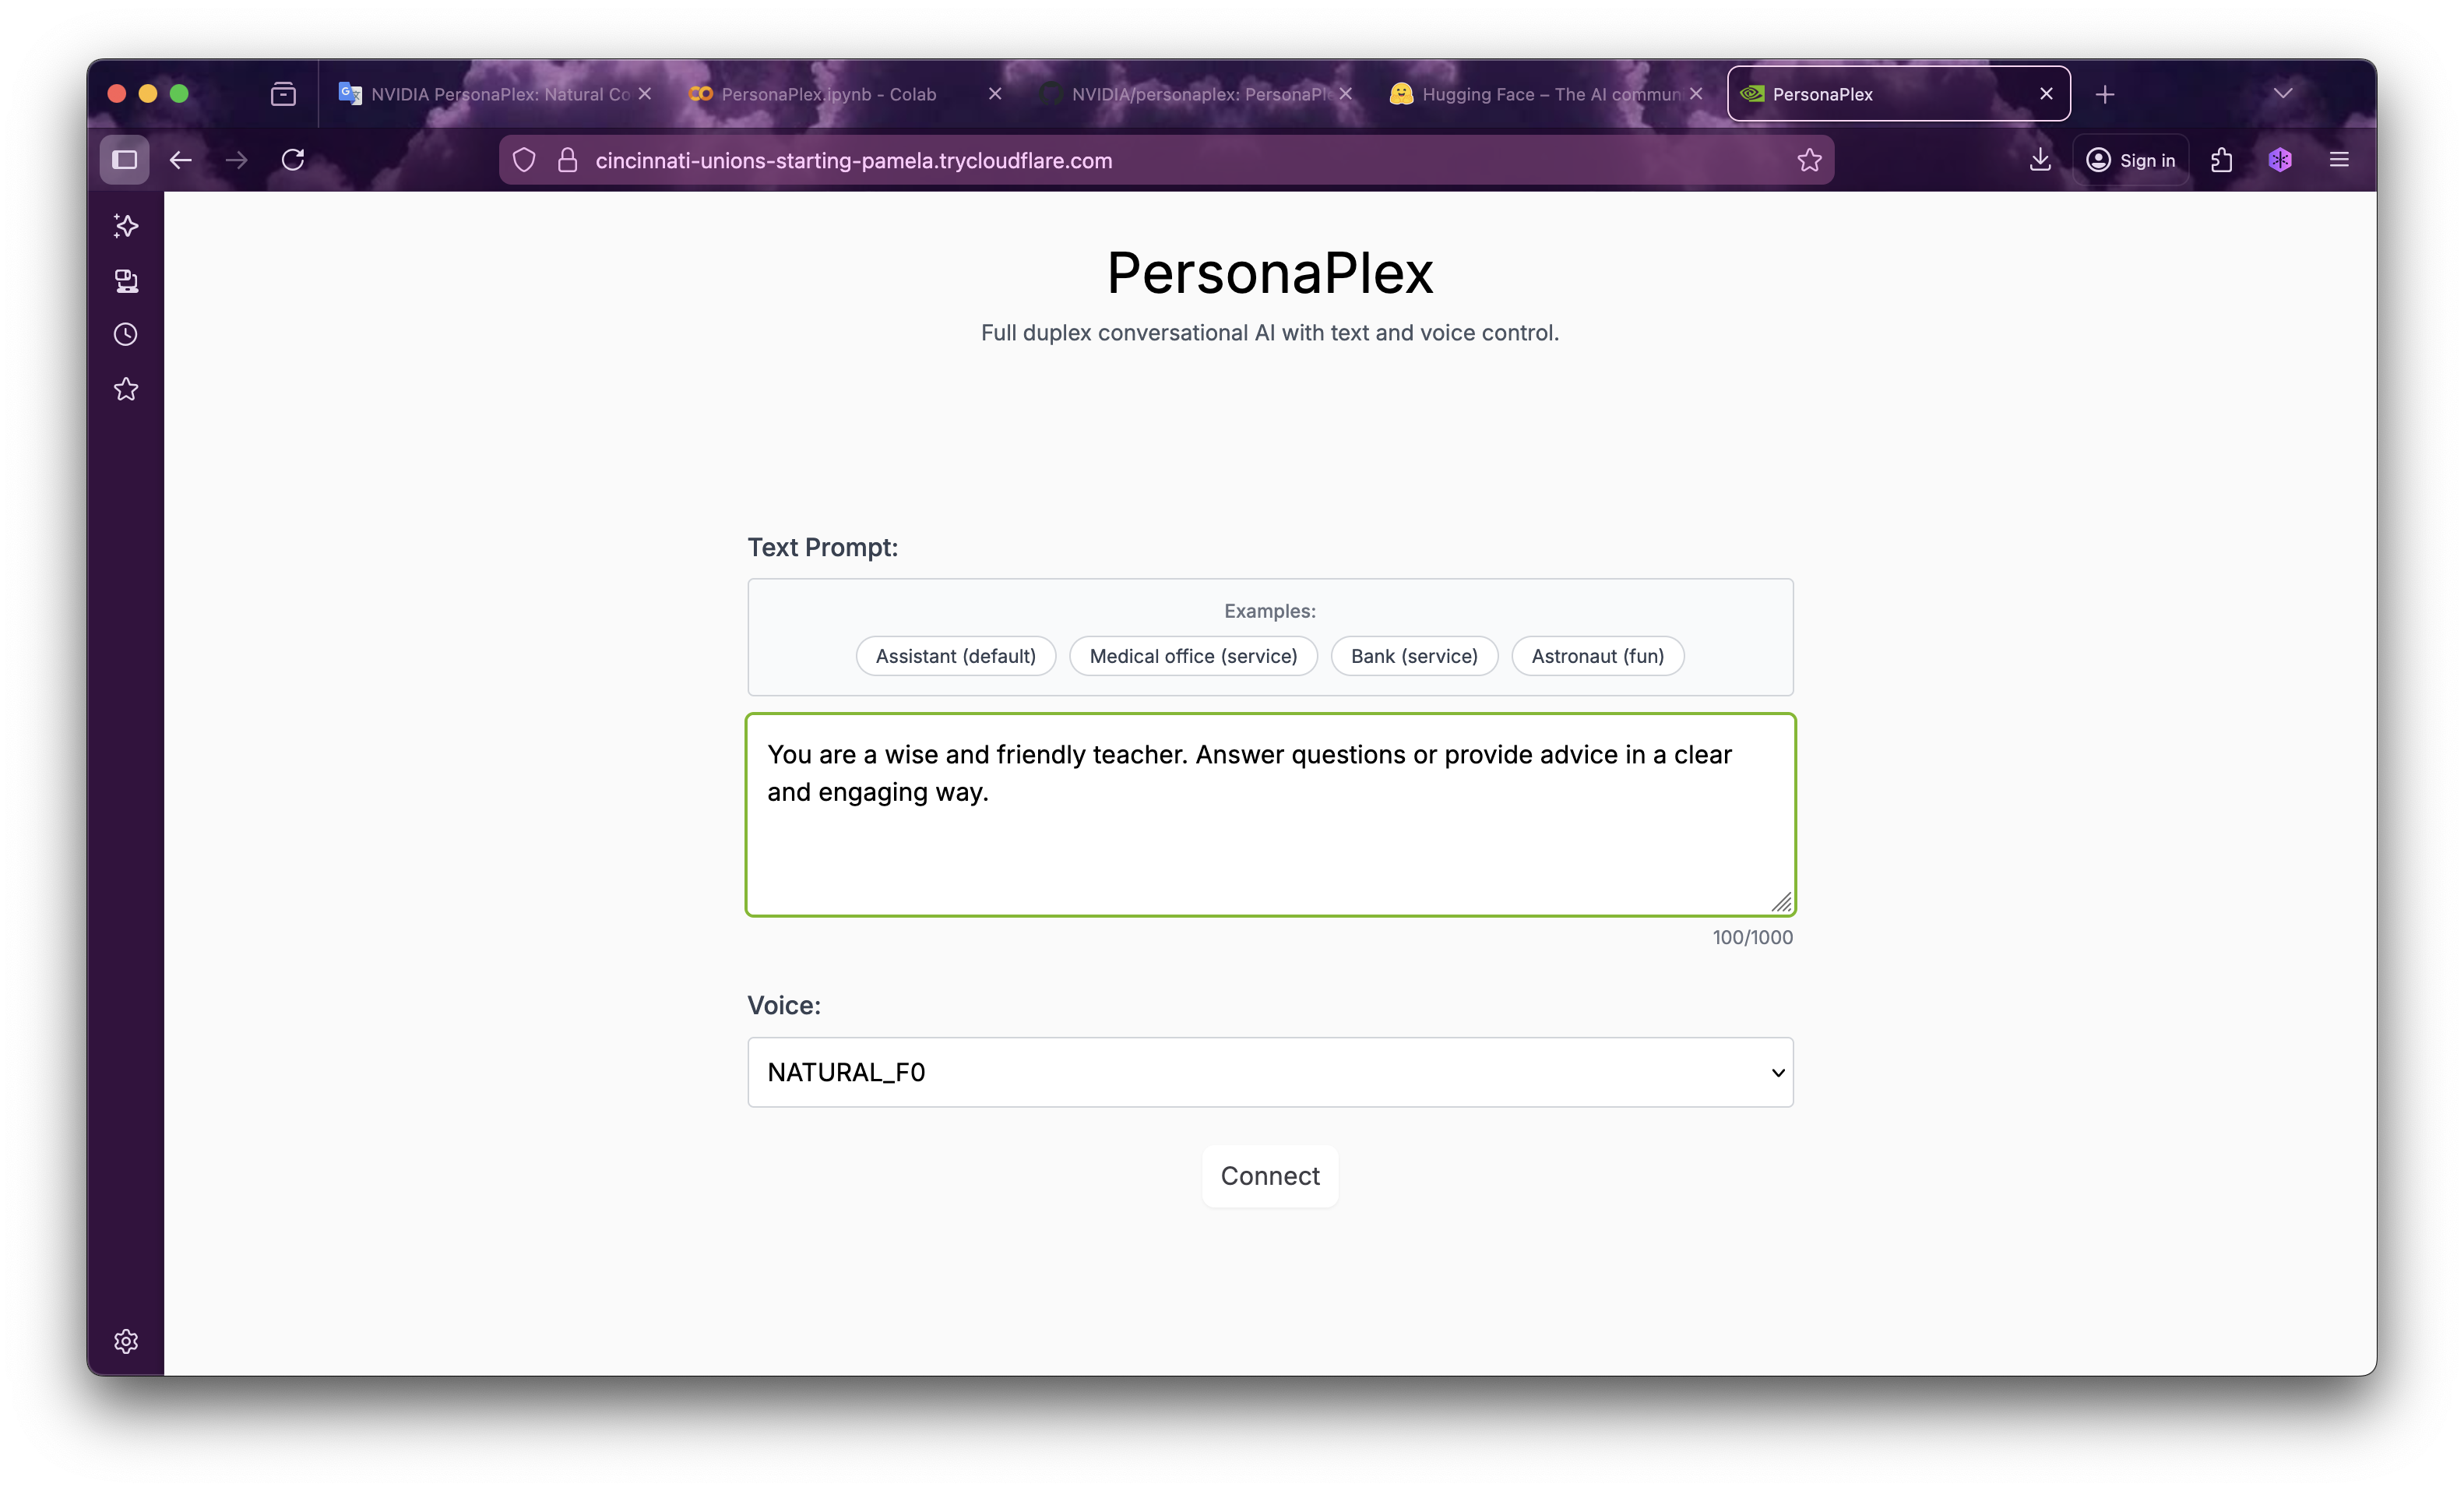

Bu arayüzde istediğiniz gibi promptu özelleştirebilir ve modelin rolünü, ismini belirtebilirsiniz. **Connect** tuşuna bastığınızda mikrofon erişimi isteyecek, eğer mikrofon erişimi istemezse Https bağlantısını kontrol edin.

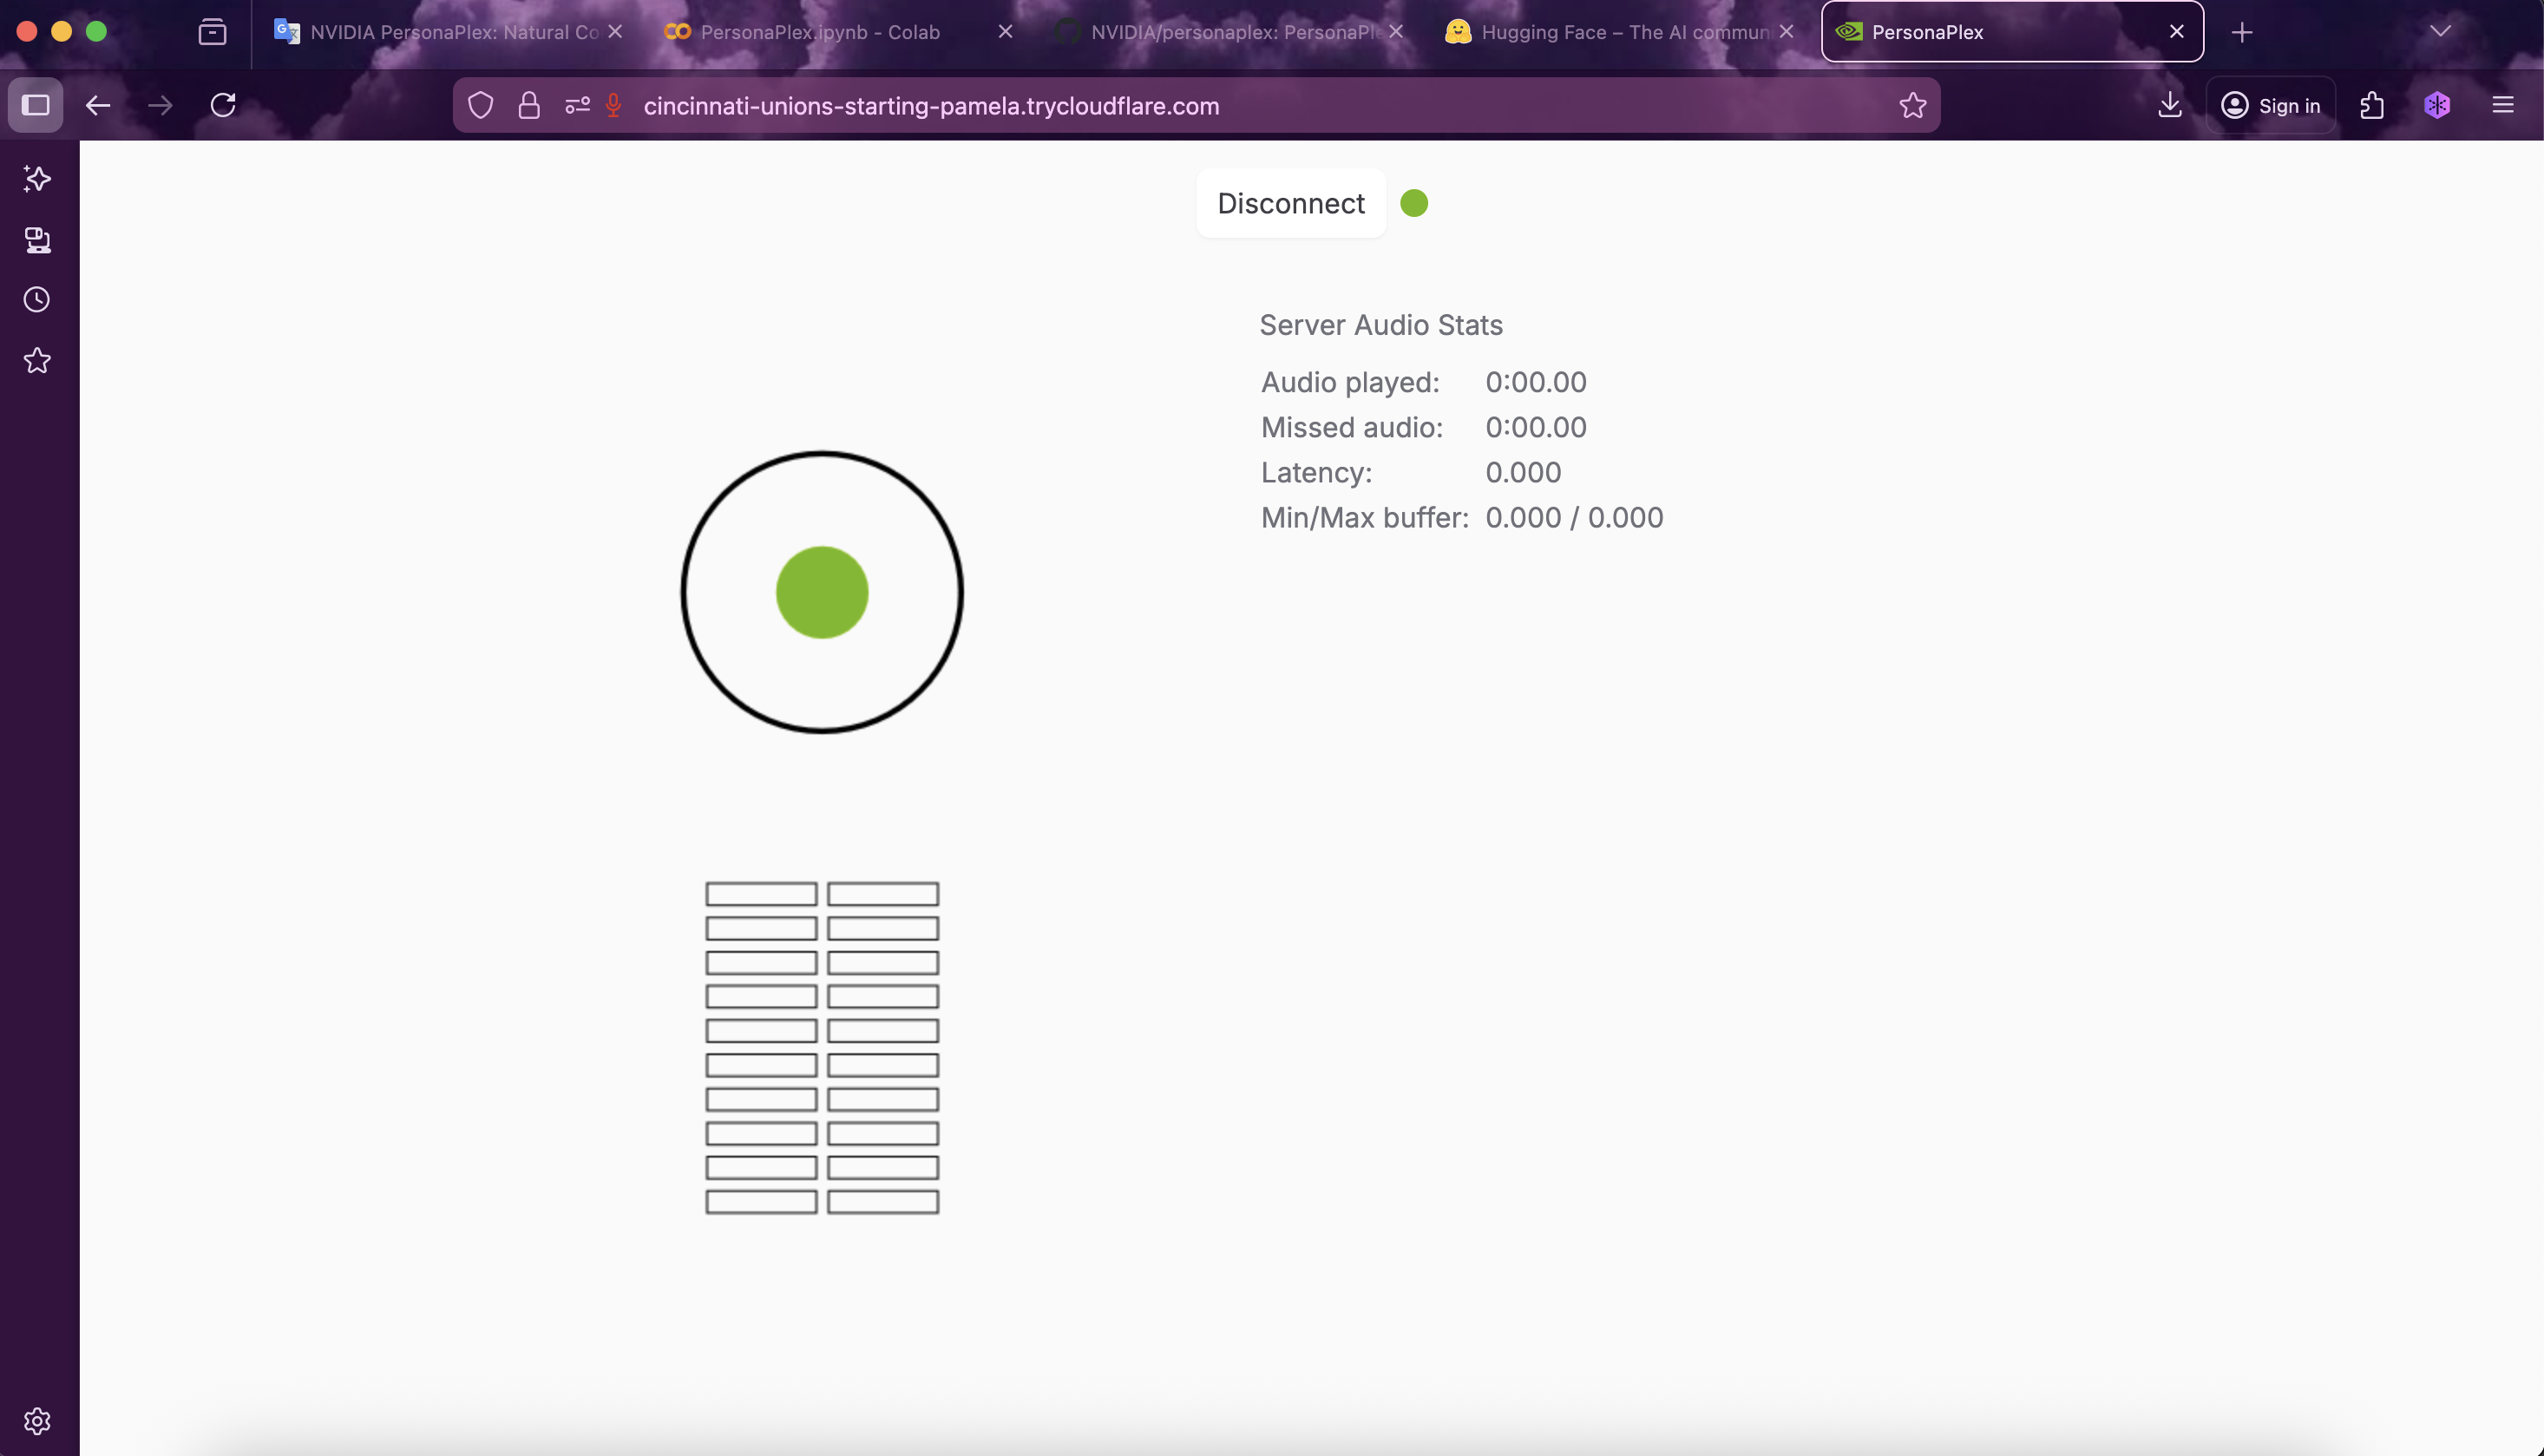

# Artık hazır.